# SIMULACIÓN | PROYECTO UNIDAD 1




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la primera unidad de Probabilidades, con el uso de un set de datos real extraidos de un medio libre. En algunos casos deberá investigar ciertos contenidos para apoyar sus conclusiones.  


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. Las preguntas deben ser respondidas en celdas de texto (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- Debe subir a siveduc en la tarea Proyecto1, su notebook y el archivo de datos utilizado.


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: lunes 4 de octubre 23:59 horas.  


- Este trabajo pondera un 25% del total del curso 

**Integrantes:** 

In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns

from IPython.core.pylabtools import figsize

In [3]:
import random

## Parte I : Propiedades de las Probabilidades



A continuación se presenta la simulación de una población, representada por el dinero que dispone cada persona y sus transacciones económicas. 

1. (1 puto) Analice la simulación, realice las siguientes modificaciones en el proceso e interprete sus resultados:

    (a) Modifique la distribución inicial de dinero. ¿Cómo se comporta el coeficiente de Gini y la distribución de la riqueza?
    
    (b) Modifique la función de transacción para aumentar o disminuir el índice de Gini. 
    
    (c) Comente la simulación propuesta ¿Qué otros factores inciden en los resultados de la simulación?
    
    
2. (1 punto) Defina eventos de interés $A$, $B$ y $C$ y calcule las siguientes probabilidades mediante la simulación propuesta:

    (a) $P(A), P(B) y P(C)$ 
    
    (b) $P(A \cup B) $ 

    (c) $P(A \mid C)$
    
Ejemplos de eventos de interés (defina sus propios eventos):
- La mediana de la población es mayor o igual que $x$ pesos.
- El percentil 10% es mayor o igual que $y$ pesos
- El coeficiente de gini de la población es menor que $0.3$


#### Referencia:
https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb

**gini**: Definición de la métrica de equidad de gini 

**transaccion**: accion de intercambio de dinero, puede ser justa o injusta

**interaccion**: eleccion de los actores que realizan la transacción

**simula**: funcion de simulacion, dinerop: lista que representa la cantidad de dinero actual que tiene cada persona, T: cantidad de iteraciones 

In [4]:
def gini(y):
    "Calcula el coeficiente de Gini: una medida de la equidad/inequidad en la"
    "población y (representada por una lista que contabiliza el dinero actual de cada persona."
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

def transaccion(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.uniform(0,pozo)
    #parte1 = np.random.binomial(pozo,0.05)
    return parte1, pozo - parte1

def transaccion_injusta(A, B): return random.choice(([A + B, 0], [0, A + B]))

def interaccion(N): return random.sample(range(N), 2)

def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]



**SIMULACIÓN: modifíquela para realizar sus cálculos **

In [5]:

def simula(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion(dinerop[i], dinerop[j]) 
        yield dinerop

*** Ejemplo de la simulación con una poblacion, donde los cuatro actores inician con 100$ y 8 iteraciones ***

In [6]:
#Ejemplo simple de simular una población de 4 actores, con $100 cada uno inicialmente y 8 iteraciones:
#for pop in simula([100] * 4, 8):
#    print(pop)

*** Puede tomar como ejemplo los siguientes gráficos y estadísticas presentadas *** 

In [7]:
import statistics

def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()           


   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  20.1   54   75  101  127  147
 20,000 0.49  98.5    1   11   71  229  443
 40,000 0.50 102.1    1   11   69  233  487
 60,000 0.50 100.2    1   11   71  230  450
 80,000 0.49  98.4    1   10   72  230  452
100,000 0.51 102.6    1   10   68  233  475
120,000 0.50 102.2    1   10   68  231  476
140,000 0.49  96.6    1   11   70  234  424
160,000 0.50 100.6    1   10   69  231  467
180,000 0.50 102.1    1   11   71  232  460
200,000 0.50 100.5    1   11   70  229  461


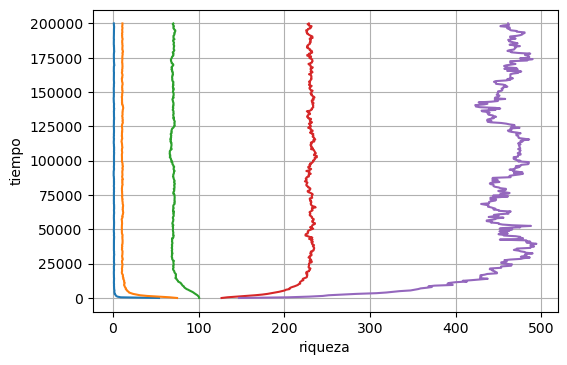

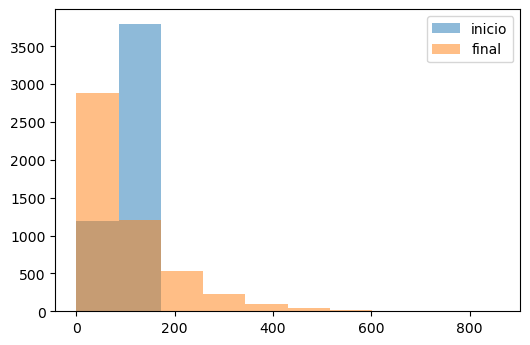

In [40]:
#random.seed(133)

N  = 5000 # Tamaño de la población
MU = 100 # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)] #genera un arreglo de 5000 numeros aleatorios con distribucion gaussiana

#print(dinerop)

show(dinerop)

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.51   1.0    0    0    1    2    5
 20,000 0.49   1.0    0    0    1    2    5
 40,000 0.50   1.0    0    0    1    2    5
 60,000 0.50   1.0    0    0    1    2    5
 80,000 0.50   1.0    0    0    1    2    5
100,000 0.50   1.0    0    0    1    2    5
120,000 0.50   1.0    0    0    1    2    5
140,000 0.50   1.0    0    0    1    2    5
160,000 0.50   1.0    0    0    1    2    5
180,000 0.51   1.0    0    0    1    2    5
200,000 0.49   1.0    0    0    1    2    5


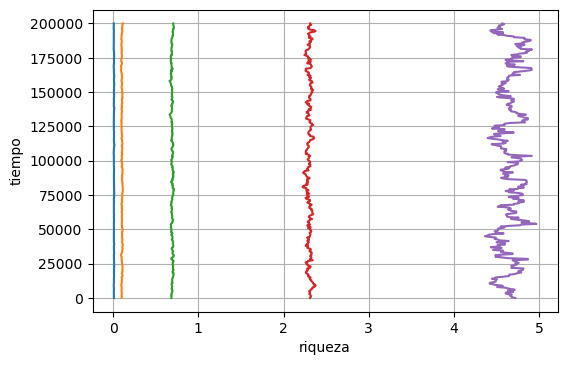

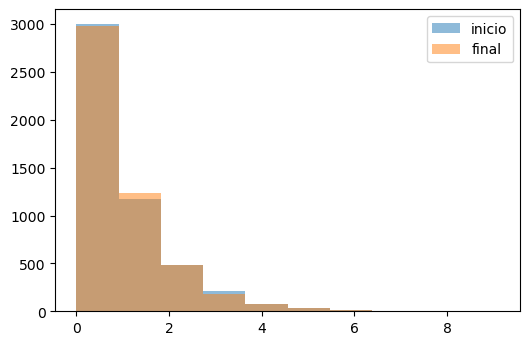

In [9]:
N  = 5000 # Tamaño de la población
MU = 100. # Dinero medio en la población

dinerop = [np.random.exponential() for actor in range(N)]

show(dinerop)

**a)** Al cambiar de distribucion a una distribucion  exponencial se puede observar que el indice de gini se mantiene cercano al valor 0.5 sin importar el valor de t (numero de transacciones realizadas) lo que nos indica que hay una alta desigualdad reflejandose directamente en la distribucion de riqueza en donde ademas se puede observar que esta desigualdad se mantiene en el tiempo desde el principio.

**b)** Al usar una transaccion binomial en vez de una uniforme, el dinero se distribuye de forma muy desigual, lo cual se ve en un gini que se mantiene sobre el 0.8, concentrando mucho dinero en un una muy pequeña parte de la población y muy poco dinero para el resto, superando incluso a los coeficientes de gini de los paises mas desiguales del mundo (como sudáfrica) los cuales no superan el 0.7

**c)** Obviando la distribución y la forma en la que se hace la transacción, después de variar el tamaño de la población (aumentarla y disminuiarla), el dinero medio por actor (aumentarlo y disminuirlo) y el número de interacciones (aumentarlo y disminuirlo), concluimos que ningún otro valor incide en el resultado final de la simulación, puesto que siempre se llegaba al mismo coeficiente de gini y en el mismo lapso de t.

**1.2**

In [42]:
def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show2(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    A=0
    B=0
    C=0
    AB=0
    AC=0
    N = len(dinerop)
    inicio = list(dinerop)
    
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    
    #Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
            
            #Este sirve para tener los gini
            if(gini(pop)>0.50):
                A+=1
                #print(A)

            
            #Este sirve para tener los la desviación
            #print(statistics.stdev(pop))
            if(statistics.stdev(pop)>20):
                B+=1
                #print(B)
                
            #Este sirve para el percentil 50%
            #print(data[2])
            if(data[2]>=69):
                C+=1
                #print(C)
            if(gini(pop)>0.50 or statistics.stdev(pop)>20):
                AB+=1
                #print(AB)

            if(gini(pop)>0.50 and data[2]>=69):
                AC+=1

                
        #print(gini(pop))
        #print(statistics.stdev(pop))
        
    print("Probabilidad de gini: ")      
    print((A/11)*100)
    print("Probabilidad de Desviación estandar: ")      
    print((B/11)*100)
    print("Probabilidad de Persentil: ")      
    print((C/11)*100)
    print("Probabilidad de AB: ")      
    print((AB/11)*100)
    #probabilidad condicional
    print("Probabilidad de AC: ")   
    print((AC/11)*100)
    print(((AC/11)/(C/11))*100)
    
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    
    
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  19.8   54   74  100  125  146
 20,000 0.50  98.7    1   11   70  233  443
 40,000 0.50  99.9    1   10   69  228  458
 60,000 0.49  97.6    1   10   70  228  455
 80,000 0.50  99.9    1   11   69  232  468
100,000 0.50  99.8    1   11   68  234  457
120,000 0.50 100.2    1   10   68  230  477
140,000 0.50 100.0    1   11   68  231  463
160,000 0.50 100.2    1   10   68  230  462
180,000 0.49  95.5    1   10   71  231  436
200,000 0.50  98.2    1   11   70  231  449
Probabilidad de gini: 
36.36363636363637
Probabilidad de Desviación estandar: 
90.9090909090909
Probabilidad de Persentil: 
54.54545454545454
Probabilidad de AB: 
90.9090909090909
Probabilidad de AC: 
0.0
0.0


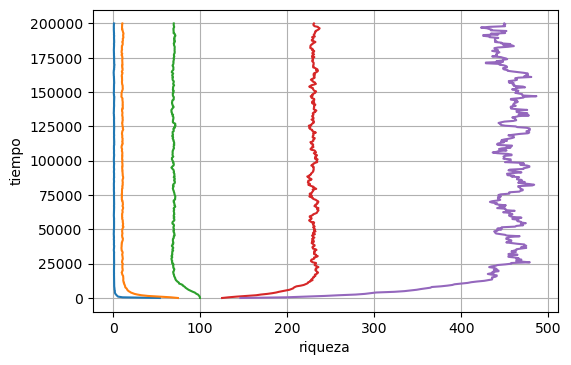

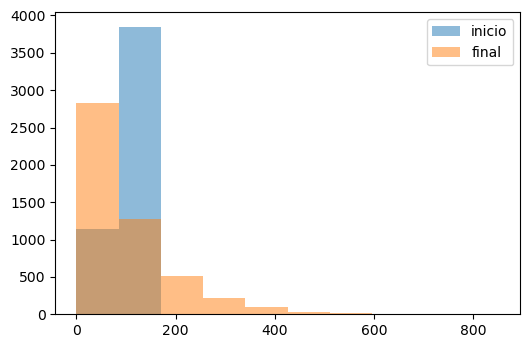

In [47]:
N  = 5000 # Tamaño de la población
MU = 100 # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show2(dinerop)

## Parte II: Distribuciones 

Busque un conjunto de datos disponible en un repositorio público, que contenga un conjunto de datos (al menos 1000 datos) de una variable aleatoria a valores reales. Utilice el set de datos para realizar las siguientes actividades:

Ejemplo de repositorio de datos climáticos: www.cr2.cl

0. Indique la fuente de sus datos. 


1. (0,5 pts) Descripcion de datos:  describa sus datos estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos. 

2. (1 punto) Seleccione aleatoriamente una cantidad N de sus datos y calcule 3 estadísticos muestrales, luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.

3. (1 punto) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

4. (0,5 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.

5. (1 punto) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados. 


In [48]:
import pandas as pd
import scipy.stats as stats
import statistics
data = pd.read_csv('./EC_series.csv', sep=',', comment='#', na_values=['Nothing'])
data

,year,month,day,valor
0,1973,2,16,19.0
1,1973,3,14,14.5
2,1973,3,18,19.7
3,1973,3,21,16.0
4,1973,3,24,15.3
...,...,...,...,...
14747,2021,7,20,8.4
14748,2021,7,21,9.9
14749,2021,7,22,9.3
14750,2021,7,23,9.8


Fuente de los datos www.cr2.cl

**1.** Los datos corresponden a la temperatura media por día en grados centígrados tomadas por la estacion meterológica de valdivia desde febrero de 1973 hasta julio del año 2021

In [49]:
#DESCRIPCIÓN DE LOS DATOS ESTADÍSTICAMENTE
data["Fecha"] = pd.to_datetime(data[['year', 'month', 'day']])
df = data[["Fecha", "valor"]]
df

,Fecha,valor
0,1973-02-16,19.0
1,1973-03-14,14.5
2,1973-03-18,19.7
3,1973-03-21,16.0
4,1973-03-24,15.3
...,...,...
14747,2021-07-20,8.4
14748,2021-07-21,9.9
14749,2021-07-22,9.3
14750,2021-07-23,9.8


In [50]:
df.describe()

,valor
count,14752.000000
mean,12.940916
std,4.586601
min,-1.800000
25%,9.800000
50%,12.800000
75%,16.200000
max,29.000000


In [51]:
print("median: " + str(df["valor"].median()))

median: 12.8


<BarContainer object of 14752 artists>

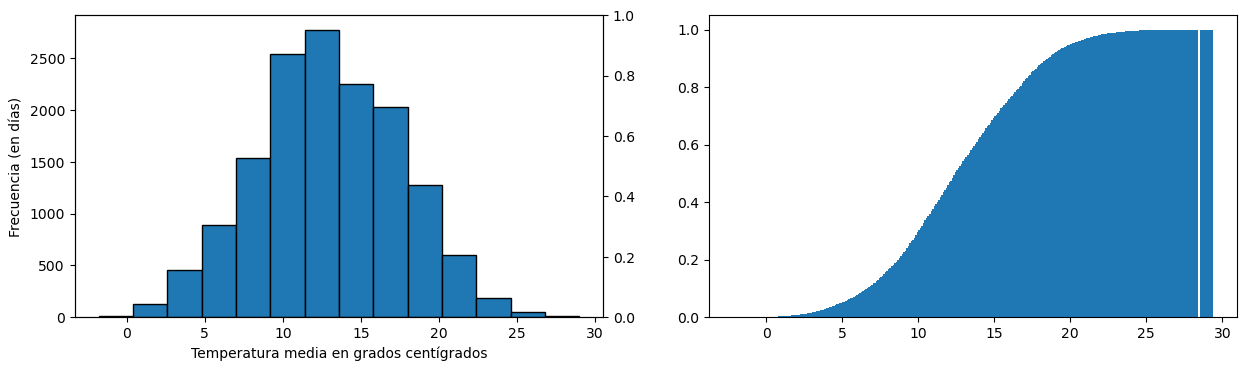

In [52]:
fig, axs = plt.subplots(1,2,figsize=(15, 4), dpi=100)

datos = df["valor"]

def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

#plt.xticks(rotation=90)
axs[0].hist(datos, edgecolor = 'black',bins = int(70/5))
axs[0].set_xlabel("Temperatura media en grados centígrados")
axs[0].set_ylabel("Frecuencia (en días)")
ax1 = axs[0].twinx()
## Graficamos el histograma y la distribución empírica
x,cum_norm = ecdf(datos)
axs[1].bar(x,cum_norm)

**2.**

        N  Media  Mediana    SD
0     200  13.51    13.85  4.89
1     300  12.63    12.40  4.66
2     400  12.94    13.00  4.72
3     500  12.97    12.80  4.61
4     600  12.88    12.90  4.69
..    ...    ...      ...   ...
95   9700  12.97    12.85  4.55
96   9800  13.00    13.00  4.57
97   9900  12.95    12.90  4.58
98  10000  13.00    12.80  4.62
99  10100  12.95    12.80  4.63

[100 rows x 4 columns]


Text(0, 0.5, 'SD')

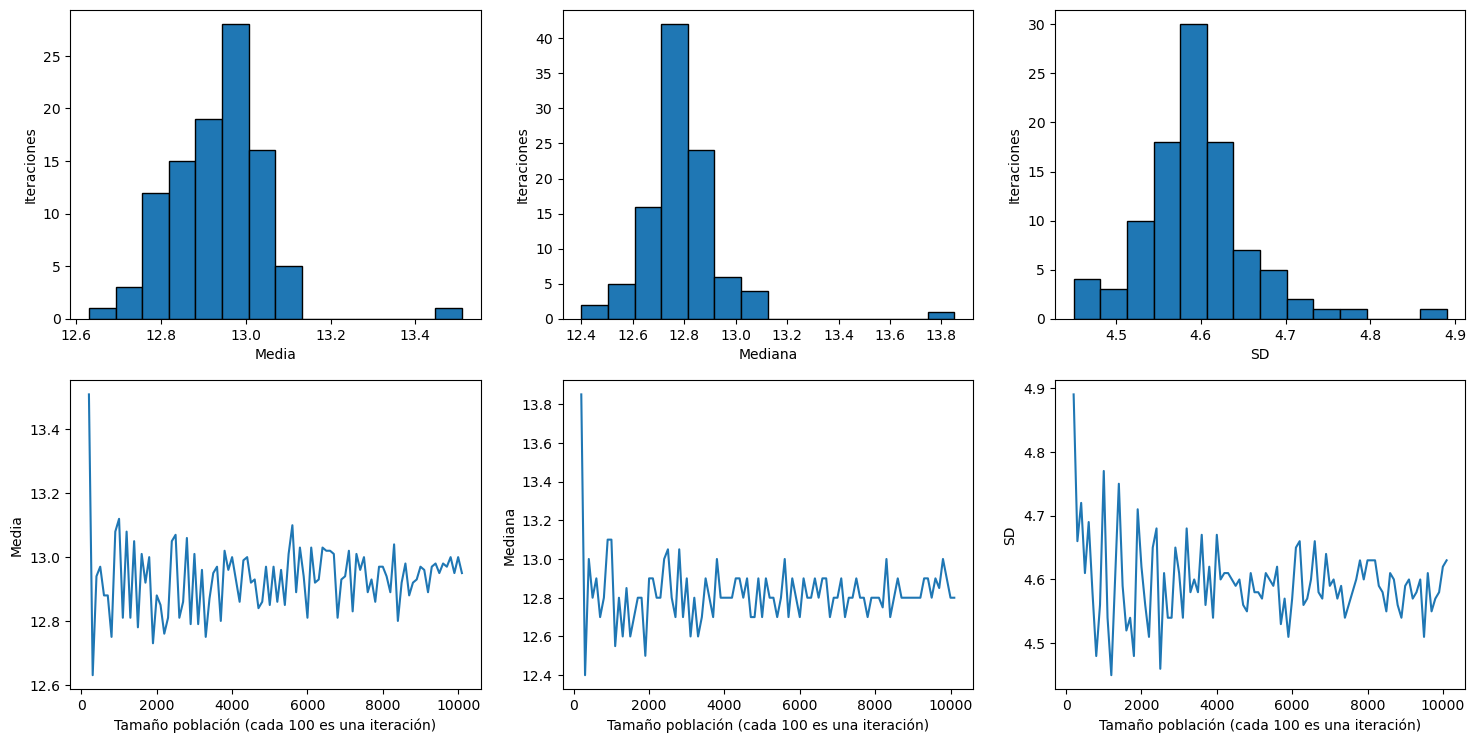

In [53]:
n= 200 # poblacion inicial
it = 100 #numero de iteraciones
inter = 100 #intervalo
means = []
medians = []
stds =[]
sizes = [n]

for i in range (it):
    dat = np.random.choice(list(datos),size=n,replace=True)
    means.append(round(dat.mean(), 2))
    medians.append(np.median(dat))
    stds.append(round(np.std(dat), 2))
    n += inter
    sizes.append(n)
    
resultados = list(zip(sizes, means, medians, stds))  

dfresult = pd.DataFrame(resultados, columns=["N",'Media', 'Mediana', 'SD'])  

print(dfresult)

fig, axs = plt.subplots(2,3,figsize=(18, 9), dpi=100)

axs[0,0].hist(dfresult["Media"], edgecolor = 'black',bins = int(70/5))
axs[0,0].set_xlabel("Media")
axs[0,0].set_ylabel("Iteraciones")
axs[0,1].hist(dfresult["Mediana"], edgecolor = 'black',bins = int(70/5))
axs[0,1].set_xlabel("Mediana")
axs[0,1].set_ylabel("Iteraciones")
axs[0,2].hist(dfresult["SD"], edgecolor = 'black',bins = int(70/5))
axs[0,2].set_xlabel("SD")
axs[0,2].set_ylabel("Iteraciones")
axs[1,0].plot(dfresult["N"],dfresult["Media"])
axs[1,1].plot(dfresult["N"],dfresult["Mediana"])
axs[1,2].plot(dfresult["N"],dfresult["SD"])
axs[1,0].set_xlabel("Tamaño población (cada 100 es una iteración)")
axs[1,0].set_ylabel("Media")
axs[1,1].set_xlabel("Tamaño población (cada 100 es una iteración)")
axs[1,1].set_ylabel("Mediana")
axs[1,2].set_xlabel("Tamaño población (cada 100 es una iteración)")
axs[1,2].set_ylabel("SD")

A medida que aumentan N y por ende el tamaño de la muestra, los estadísticos muestrales estudiados (media, mediana y desviación estándar) tienen un comportamiento algo similar a lo que uno ve al estudiar un oscilador armónico amortiguado donde existe una posición inicial extrema que va oscilando hasta encontrar un equilibrio. 

Si relacionamos esto con la Ley de los Grandes números podemos notar que efectivamente el teorema se cumple, puesto que a mayor tamaño de población los estadísticos comienzan a tender hacia una constante, lo cual se puede apreciar en los histogramas claramente. 

**3.**

grupos aleatorios: 77


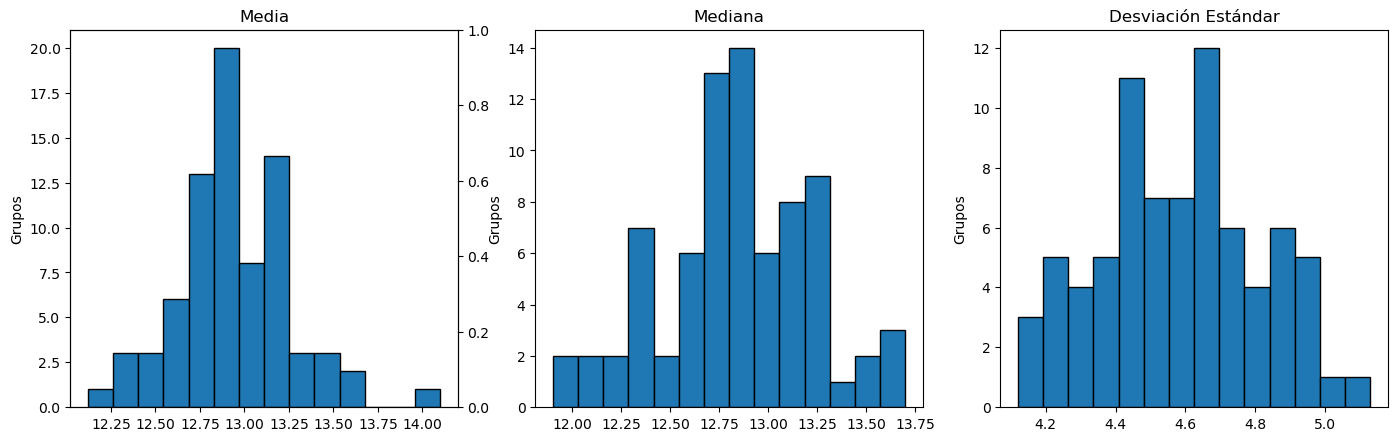

In [54]:
#3
datos = df["valor"]
dat = list(datos)
np.random.shuffle(dat)
means = []
medians = []
sd = []
n_grupos=random.randrange(50,100)
print("grupos aleatorios: " + str(n_grupos))
lista_grupos=np.array_split(dat,n_grupos)

for i in range(n_grupos):
    means.append(round(lista_grupos[i].mean(), 2))
    medians.append(round(statistics.median(lista_grupos[i]), 2))
    sd.append(round(statistics.stdev(lista_grupos[i]), 2))
    
    
fig, axs = plt.subplots(1,3,figsize=(17, 5), dpi=100)
axs[0].hist(means, edgecolor = 'black',bins = int(70/5))
axs[0].set_title('Media')
axs[0].set_ylabel("Grupos")
axs[1].hist(medians, edgecolor = 'black',bins = int(70/5))
axs[1].set_title('Mediana')
axs[1].set_ylabel("Grupos")
axs[2].hist(sd, edgecolor = 'black',bins = int(70/5))
axs[2].set_title('Desviación Estándar')
axs[2].set_ylabel("Grupos")
ax1 = axs[0].twinx()

El teorema central del limite nos dice que si tenemos una muestra aleatoria lo suficientemente grande de una población, la distribución de la media y otros estadísticos tendrán una tendencia a seguir una distribución normal.

Nuestra población total es de 14752 valores por lo que entran en la categoria de una muestra grande y al momento de graficar el histograma por cada estadístico se puede apreciar que efectivamente al dividir la muestra en grupos, sus estadísticos siguen una distribución normal.

**4.**

Hipotesis

- H0: Los datos analizados siguen una distribución Normal.
- H1: Los datos analizados no siguen una distribución Normal.

In [55]:
x=np.array(datos)
loc, scale = stats.norm.fit(x)
print(loc)
print(scale)

y = stats.norm.rvs(loc=loc,scale=scale,size=1000)

print(stats.kstest(x, y, N=100))
# estadistica D es la distancia máxima absoluta (supremum) entre los CDF(Cumulative distribution function) de las dos muestras

12.94091648590022
4.586445260258367
KstestResult(statistic=0.03219251626898045, pvalue=0.27993553662593773)


Como se puede ver, el valor de p entregado por el  test de Kolmogorov-Smirnov es mayor a 0.05 por lo que **NO** se puede rechaza la hipontesis nula (H0) lo cual tiene sentido ya que si observamos el histograma de los datos se puede observar claramente que sigue una distribucion normal.

In [56]:
y = stats.expon.rvs(loc=loc,scale=scale,size=1000)

print(stats.kstest(x, y, N=100))

KstestResult(statistic=0.5101681127982647, pvalue=1.0636062325416676e-226)


Por otro lado si comparamos la distribucion de los datos con una distribucion exponencial el test nos devuelve pvalue=1.0636062325416676e-226 < 0.05 por lo cual rechazaria la hipotesis que los datos siguen una distribucion exponencial.

**5.**

In [57]:
import math
from IPython.display import display, Math
import ipywidgets as widgets

def errcuadmedio(est, listest):
    # calculo del error medio cuadratico
    sum = 0
    a = 0
    for i in listest:
        sum += (est-i)**2
        a +=1
    mse_val = sum/a
    return mse_val    

b = 100 #VALORES MAYORES A 100 TOMAN MUCHO TIEMPO DE PROCESAMIENTO!!
datos = df["valor"]
n = len(datos)

m = statistics.mean(datos)
md = statistics.median(datos)
sd = statistics.stdev(datos)

means = []
medians = []
sds = []

for i in range (b):
    bdata = np.random.choice(list(datos),size=n,replace=True)
    #print(bdata)
    #print(str(len(bdata)))
    means.append(bdata.mean())
    medians.append(statistics.median(bdata))
    sds.append(statistics.stdev(bdata))
    
#MEDIAS

var0 = statistics.variance(means)
print("\nValor de b: " + str(b) + "\nvarianza medias: " + str(var0))
rango = 1.96*math.sqrt(var0)
display(Math('%0.2f \pm %0.2f' % (m, rango )))
print("error medio cuadratico de la media aritmetica : " + str(errcuadmedio(m, means)))
    
    
#MEDIANAS    
var1 = statistics.variance(medians)
print("\nValor de b: " + str(b) + "\nvarianza medianas: " + str(var1))
rango = 1.96*math.sqrt(var1)
display(Math('%0.2f \pm %0.2f' % (md, rango )))
print("error medio cuadratico de la media aritmetica : " + str(errcuadmedio(md, medians)))

#DESVIACION ESTANDAR

var2 = statistics.variance(sds)
print("\nValor de b: " + str(b) + "\nvarianza desviaciones estandar: " + str(var2))
rango = 1.96*math.sqrt(var2)
display(Math('%0.2f \pm %0.2f' % (sd, rango )))
print("error medio cuadratico de la media aritmetica : " + str(errcuadmedio(sd, sds)))


Valor de b: 100
varianza medias: 0.0013484895157068887


<IPython.core.display.Math object>

error medio cuadratico de la media aritmetica : 0.00133619232454161

Valor de b: 100
varianza medianas: 0.0018949494949494858


<IPython.core.display.Math object>

error medio cuadratico de la media aritmetica : 0.002199999999999988

Valor de b: 100
varianza desviaciones estandar: 0.0006762242531427083


<IPython.core.display.Math object>

error medio cuadratico de la media aritmetica : 0.0006707092302429208


Se puede observar que las costas superiores e inferiores resultantes después de realizar boostrap en nuestros estadísticos (media, mediana y la desviación estándar) fue consideramente baja, por lo que se puede concluir que al realizar boostrap sobre nuestros datos la incertidumbre obtenida va a hacer baja.

### Referencias útiles para la parte II: 



[1] **Ley de los grandes números:**  https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb


[2] Ross, https://drive.google.com/file/d/1tenWSvfAU2336m-km4vRMorKmDIQRKme/view?usp=sharing

## Parte III: Conclusiones


1. (0,8 pts) Presente las conclusiones de su trabajo. 

2. (0,2 pts) Además reflexione respecto a qué significa que los datos sean **independientes e identicamente distribuidos** y por qué se debe cumplir esta condición en los grupos seleccionados aleatoriamente en las preguntas 2 y 3 de la parte II (puede reflexionar en torno a qué pasaría si no lo fueran) 


**1.**

Al trabajar este proyecto de la unidad pudimos apreciar la gran utilidad y potencia de las herramientas para estadísticas que tenemos a nuestra disposición, pero más allá de eso.

Respecto a la Parte I, podemos concluir que el coeficiente de Gini es un muy buen estadístico porque es bastante fácil de trabajar, entender e interpretar, lo cual ayudó a entender y aplicar las propiedades de las probabilidades sin mayores problemas, donde pudimos sacar algunas pequeñas conclusiones interesantes en las preguntas relacionadas con incidir o modificar el resultado del coeficiente, lo cual resulto mas desafiante de lo que parecia en un principio.

Respecto a la Parte II, pudimos comprobar la veracidad de los teoremas de los grandes números y el teorema del límite central, además de afirmar la gran consistencia de los datos, sumado a que fue bastante interesante el poder estudiar un factor relacionado al clima (la temperatura media) en la ciudad donde viven varios de nuestros compañeros y general una pequeña muestra de lo que es el sur de Chile.

**2.**

Que los datos sean independientes se refiere a que los datos analizados no tinen ninguna relacion entre si, es decir, por ejemplo si elegimos un dato al azar este no va a depender de los datos escogidos anteriormente o de los que se sean elegidos posteriormente. Por otro lado, que sean identicamente distribuidas se refiere a que la distribucion de los datos es la misma, o en otras palabras que los datos tienen o pertenecen a la misma distribucion.

Para las preguntas 2 y 3 de la parte II es necesario que los datos sean independientes e identicamente distribuidos ya que si no lo fueran los teoremas de los grandes numeros y el del límite central no hubieran podido comprobarse correctamente y hubieramos obtenidos unos resultados y gráficos diferentes.

Una forma de haber cambiado la independencia de los datos por ejemplo hubiera sido no hacer reemplazo a la hora de escoger n elementos aleatorios de la población para hacer una muestra en la pregunta 2 por ejemplo.